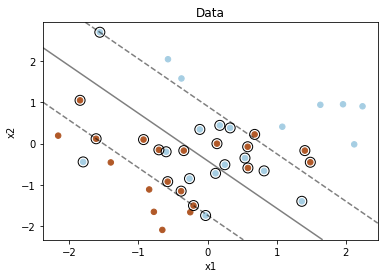

[[0.62901122 0.37098878]
 [0.26314804 0.73685196]]


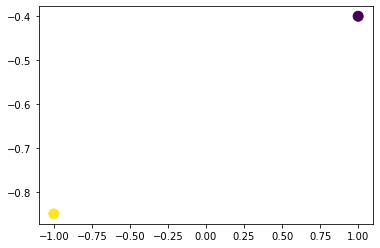

In [3]:
import pandas as pd
import numpy as np
 
from sklearn import svm
 
import matplotlib.pyplot as plt

n_cls = 20   
 
np.random.seed(1)  # for reproducibility
x11 = np.random.normal(0.5, 1, (n_cls, 1))
np.random.seed(2)  # for reproducibility
x12 = np.random.normal(0.4, 1, (n_cls, 1))
np.random.seed(3)  # for reproducibility
x21 = np.random.normal(-0.3, 1, (n_cls, 1))
np.random.seed(4)  # for reproducibility
x22 = np.random.normal(-0.5, 1, (n_cls, 1))
 
X = np.vstack((
    np.hstack((x11, x12)),
    np.hstack((x21, x22))
))
 
y = np.hstack((-1 * np.ones(n_cls), +1 * np.ones(n_cls)))

clf = svm.SVC(kernel='linear', C=1000, random_state=1, probability=True)
clf.fit(X, y)

fig = plt.figure(1)
plt.clf()
 
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
 
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
 
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
 
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data')
plt.show()

X_new = np.array([
    [1, -0.4],
    [-1, -0.85],
    ])
 
y_new = clf.predict(X_new)
 
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new, s=100)
fig.canvas.draw()
fig.canvas.flush_events()

# Get posterior probabilities for predictions (requires SVC to be created with
#   `probability=True`).
post_probs = clf.predict_proba(X_new)
print(post_probs)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


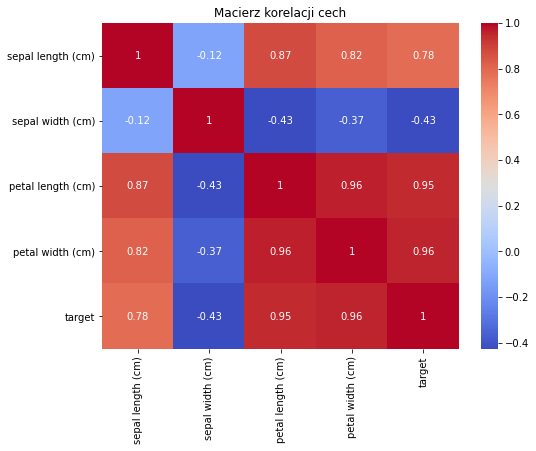

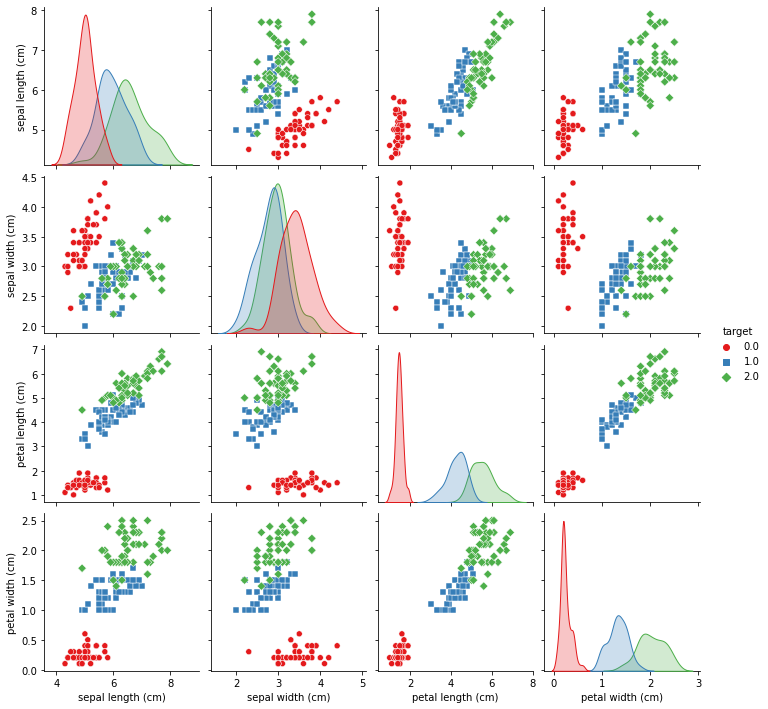

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Załadowanie zbioru danych Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Przekształcenie danych na DataFrame, żeby łatwiej było je wizualizować
df = pd.DataFrame(data=np.c_[X, y], columns=iris.feature_names + ['target'])

# Wyświetlenie pierwszych 5 wierszy danych
print(df.head())


# Macierz korelacji
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Macierz korelacji cech')
plt.show()

# Wykresy rozrzutu dla wszystkich cech
sns.pairplot(df, hue="target", palette="Set1", markers=["o", "s", "D"])
plt.show()


# Podział danych na zbiór treningowy i testowy (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



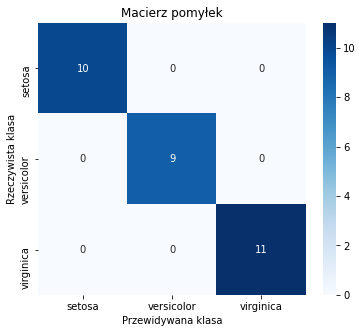

In [9]:
# Tworzenie i trenowanie modelu SVM
model = SVC(kernel='linear', decision_function_shape='ovr')
model.fit(X_train, y_train)

# Przewidywanie wyników na danych testowych
y_pred = model.predict(X_test)

# Raport klasyfikacji
print(classification_report(y_test, y_pred))

# Macierz pomyłek
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Macierz pomyłek')
plt.xlabel('Przewidywana klasa')
plt.ylabel('Rzeczywista klasa')
plt.show()
